In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv('all_things.csv')

The above is a CSV file that tracks the per capita GDP for each country in the world (where available), along with the percentage of people in each country who pray on a daily basis, based on survey data. There are four columns:

**Country/Territory**: The name of the country  
**GDP**: The GDP per capita of that country  
**Pray_Daily**: The percentage of respondents from that country who pray daily  
**Continent**: The continent that country is located in

Instructions:

Answer all questions. For any graphs, labelling the axes, titling the graph and changing the size of the graph are **NOT** required unless specifically noted.

In [3]:
df.head()

,Country/Territory,GDP,Pray_Daily,Continent
0,Ireland,78785.0,19.0,Europe
1,Norway,74356.0,18.0,Europe
2,Switzerland,64649.0,8.0,Europe
3,United States,62606.0,55.0,North America
4,Netherlands,56383.0,20.0,Europe


1) Plot a histogram of the percentage of adults who pray daily by country in the world. What type of distribution is the result closest to?

(array([ 9., 14., 13.,  7.,  8.,  9., 12., 10., 15.,  8.]),
 array([ 1. , 10.5, 20. , 29.5, 39. , 48.5, 58. , 67.5, 77. , 86.5, 96. ]),
 <a list of 10 Patch objects>)

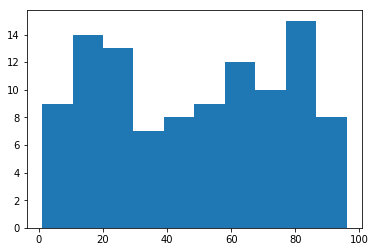

In [4]:
plt.hist(df['Pray_Daily'])

This is closest to a uniform distribution.

2) What is the mean and standard deviation of the percentage of people who pray daily per country?

In [5]:
df['Pray_Daily'].mean()

48.542857142857144

In [6]:
df['Pray_Daily'].std()

27.391754995951647

3) If you were to build a **normal distribution** with the above mean and standard distribution, what would the 95th percentile value be of that distribution?

In [7]:
stats.norm(df['Pray_Daily'].mean(), df['Pray_Daily'].std()).ppf(0.95)

93.59828469651433

4) Which five countries have the highest percentage of respondents who pray daily? Which five countries have the lowest?

In [8]:
df.sort_values('Pray_Daily').head()

,Country/Territory,GDP,Pray_Daily,Continent
46,China,18110.0,1.0,Asia
14,United Kingdom,45705.0,6.0,Europe
2,Switzerland,64649.0,8.0,Europe
8,Austria,52137.0,8.0,Europe
23,Estonia,34096.0,9.0,Europe


In [9]:
df.sort_values('Pray_Daily').tail()

,Country/Territory,GDP,Pray_Daily,Continent
104,Niger,1217.0,87.0,Africa
54,Algeria,15440.0,88.0,Africa
92,Senegal,3651.0,88.0,Africa
82,Nigeria,6027.0,95.0,Africa
100,Afghanistan,2017.0,96.0,Asia


5) Find the average time that responders from each continent pray. Which continent prays the most on average? And which prays the least?

In [10]:
df.groupby('Continent')['Pray_Daily'].mean()

Continent
Africa           75.695652
Asia             52.208333
Europe           24.868421
North America    64.600000
Oceania          18.000000
South America    54.888889
Name: Pray_Daily, dtype: float64

Asia prays the most on average, while Oceania prays the least.

6) Plot a boxplot showing how much different respondents in Europe pray. Are there any outliers? If so, which countries are outliers and how much do respondents from those countries pray?

{'boxes': [<matplotlib.lines.Line2D at 0x1297955f8>],
 'caps': [<matplotlib.lines.Line2D at 0x1297a2128>,
 'fliers': [<matplotlib.lines.Line2D at 0x1297a2e48>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1297a29e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1297957f0>,
  <matplotlib.lines.Line2D at 0x129795c88>]}

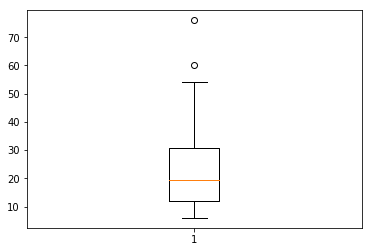

In [11]:
plt.boxplot(df[df['Continent'] == 'Europe']['Pray_Daily'])

In [12]:
df[df['Continent'] == 'Europe'].sort_values('Pray_Daily', ascending=False)

,Country/Territory,GDP,Pray_Daily,Continent
48,Azerbaijan,18076.0,76.0,Europe
33,Turkey,27956.0,60.0,Europe
65,Kosovo,11552.0,54.0,Europe
80,Moldova,7305.0,49.0,Europe
69,Armenia,10176.0,45.0,Europe
36,Romania,26447.0,45.0,Europe
37,Croatia,26221.0,41.0,Europe
67,Georgia,11485.0,38.0,Europe
24,Portugal,32006.0,38.0,Europe
21,Slovakia,35130.0,31.0,Europe


There are two outliers - Azerbaijan and Turkey, where 76% and 70% of respondents from the respective countries prayed daily.

7) Now let's do a hypothesis test between North American and Asian countries to see if there's a statistically significant difference between the two. First, what is the mean difference between the percentage of respondents who pray daily between the average North American country and the average Asian country?

In [13]:
df[df['Continent'] == 'North America']['Pray_Daily'].mean() - df[df['Continent'] == 'Asia']['Pray_Daily'].mean()

12.391666666666659

8) Given that North American countries, on average, a higher percentage of respondents who pray daily than Asian countries, we should do a one-sided bootstrap test with a significance level of 0.05. What is the null hypothesis? And what is the alternate hypothesis?

The null hypothesis is that the same percentage of people pray daily in North American countries and Asian countries, while a higher percentage of people pray in North American countries than in Asian countries. 

9) Now let's actually run the null hypothesis. Set a random seed of 42 and run 10,000 simulations. At the stated signifiance level, what is the cutoff value for the rejection region? Given the observed value, can we reject the null hypothesis? At what percentile of the distribution is our observed value? What is the minimum significance level (integer value) with which we'd be able to reject the null hypothesis?

In [14]:
np.random.seed(42)
north_america = df[df['Continent'] == 'North America']['Pray_Daily']
asia = df[df['Continent'] == 'Asia']['Pray_Daily']
diff = []
for i in range(10000):
    total = np.concatenate((north_america, asia), axis=None)
    np.random.shuffle(total)
    new_a = total[:len(north_america)]
    new_b = total[len(north_america):]
    diff.append(np.mean(new_b) - np.mean(new_a))

In [15]:
np.percentile(diff, 95)

15.658333333333339

In [16]:
stats.percentileofscore(diff, 12.391666666666659)

89.91

At the 0.05 significance level, the cutoff value for rejection is 15.65. Our observed value is 12.39, meaning that we fail to reject the null hypothesis.

The minimum singificance level with which we'd be able to reject the null hypothesis would be 0.11.

10) Now, graph a scatterplot between the GDP for a country (on the X-axis) and the percentage of respondents who pray daily from those countries (on the Y-axis). What does the relationship looks like?

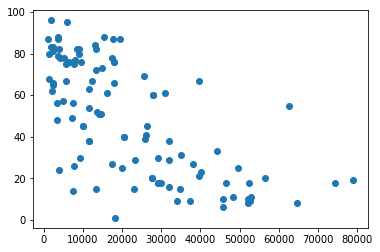

In [17]:
plt.scatter(df['GDP'], df['Pray_Daily'])

Looks like there is a fairly weak negative correlation between the two variables.

11) What is the correlation between these two variables? What does that correlation imply about the relationship between the two variables? Is the correlation statistically significant?

In [18]:
stats.pearsonr(df['GDP'], df['Pray_Daily'])

(-0.6719151739148829, 4.2764383544501245e-15)

The correlation implies that there is a moderate negative correlation between the two variables, as we suspected. The correlation is statistically significant, since its p-value is extremely close to zero.

12) What is the R-squared value between these two variables?

In [19]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [20]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(df['GDP'], df['Pray_Daily'])
np.var(predictions)/np.var(df['Pray_Daily'])

0.4514700009370681

13) If a country has a per-capita GDP of \\$50,000, what is the predicted percentage of its respondents who will pray daily according to the model?

In [21]:
intercept + (slope * 50000)

19.616041251024285

14) Which country has the closest per-capita GDP to \\$50,000 and what is the actual amount of time its respondents pray daily?

In [22]:
df[df['GDP'] > 45000]

,Country/Territory,GDP,Pray_Daily,Continent
0,Ireland,78785.0,19.0,Europe
1,Norway,74356.0,18.0,Europe
2,Switzerland,64649.0,8.0,Europe
3,United States,62606.0,55.0,North America
4,Netherlands,56383.0,20.0,Europe
5,Sweden,52984.0,11.0,Europe
6,Germany,52559.0,9.0,Europe
7,Australia,52373.0,18.0,Oceania
8,Austria,52137.0,8.0,Europe
9,Denmark,52121.0,10.0,Europe


Canada has the closet per-capita GDP to \\$50,000 with a per-capita GDP of \\$49,651. 25% of their respondents pray daily.

15) Describe the residuals plot for this relationship. Is it heteroskedastic or homoskedastic?

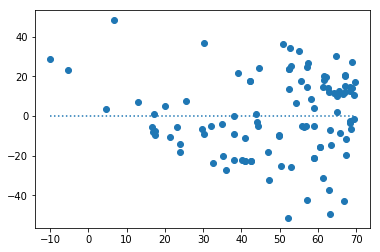

In [23]:
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle='dotted')

The plot looks heteroskedastic, as most of the data is bunched around the right side of the graph.

16) Look at the histograms for each of the variables. Which of the two would you suggest transforming to get a more linear relationship? How would you suggest transforming it?

(array([33., 19., 13., 16.,  7.,  5.,  7.,  2.,  1.,  2.]),
 array([ 1217. ,  8973.8, 16730.6, 24487.4, 32244.2, 40001. , 47757.8,
        55514.6, 63271.4, 71028.2, 78785. ]),
 <a list of 10 Patch objects>)

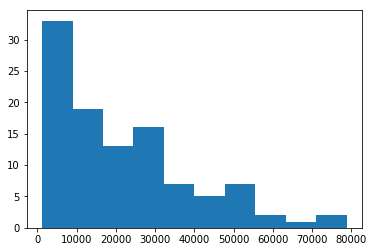

In [24]:
plt.hist(df['GDP'])

(array([ 9., 14., 13.,  7.,  8.,  9., 12., 10., 15.,  8.]),
 array([ 1. , 10.5, 20. , 29.5, 39. , 48.5, 58. , 67.5, 77. , 86.5, 96. ]),
 <a list of 10 Patch objects>)

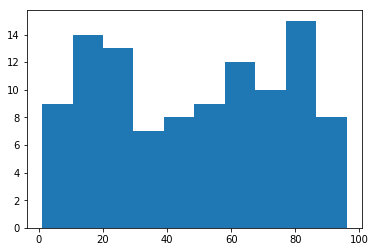

In [25]:
plt.hist(df['Pray_Daily'])

The 'GDP' variable is postively skewed - it should be transformed by taking its square root or log value.

17) Take the log value of the appropriate variable and find the new linear relationship. What is the R-squared value now?

In [26]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(np.log(df['GDP']), df['Pray_Daily'])
np.var(predictions) / np.var(df['Pray_Daily'])

0.44943864480290446

18) Describe the residuals plot for this relationship. Is it heteroskedastic or homoskedastic?

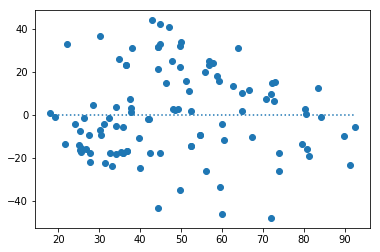

In [27]:
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle='dotted')

The plot is homoskedastic, as the variables are randomly dispersed throughout the graph.

19) Which of the two plots (the untransformed variable and the response variable, or the transformed variable and the response variable) is more appropriate for linear prediction? Why might this be counterintuitive?

The second is, since the residuals plot is homoskedastic which is more indicative of a linear relationship. This is counterintuitive, since the r-squared value for this model is lower than the r-squared value for the untransformed model.

BONUS: What is a structural error with this dataset? (Hint: are all of the values unique?)

There are a few countries that are listed twice (they are listed as being both in Europe and in Asia).

In [28]:
df['Country/Territory'].value_counts()

Kazakhstan        2
Azerbaijan        2
Armenia           2
Turkey            2
Georgia           2
Russia            2
Tunisia           1
Denmark           1
Mexico            1
Jordan            1
Costa Rica        1
Tanzania          1
Algeria           1
Botswana          1
Guatemala         1
Honduras          1
Bangladesh        1
China             1
Italy             1
Austria           1
Lithuania         1
Rwanda            1
Tajikistan        1
Peru              1
Canada            1
Netherlands       1
Ukraine           1
Bolivia           1
Norway            1
United Kingdom    1
                 ..
Finland           1
Ireland           1
Bulgaria          1
Moldova           1
Latvia            1
Uganda            1
Zambia            1
Israel            1
Uzbekistan        1
Spain             1
Uruguay           1
Philippines       1
Nigeria           1
Pakistan          1
Switzerland       1
Serbia            1
Nicaragua         1
Malaysia          1
Mozambique        1
